<a href="https://colab.research.google.com/github/xodud5654/PDM05/blob/main/py-tensorflow/DL1-FCN/proj01_diabetes_FCN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL: FCN of Pima-Indians-Diabetes-Data** 

> https://medium.com/@soumen.atta/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb

### Diabetes Prediction using Neural Networks 
- [Deep learning approach for diabetes prediction using PIMA Indian dataset](https://link.springer.com/article/10.1007/s40200-020-00520-5)

In [71]:
# Load the required packages 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
# %matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.7.0


**Load CSV file using Pandas**

In [72]:
# Specify the file name 
url = "https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/diabetes.csv"
filename = url
# filename = 'diabetes.csv'  # access to local file

# Read the data 
df = read_csv(filename) 

# Print the shape 
df.shape

(768, 9)

In [73]:
# Print the first 5 rows 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## create X and y datasets for training from df

In [74]:
from sklearn import model_selection

In [75]:
# create X and Y datasets for training from raw df
X = np.array(df.drop(['Outcome'], 1))
y = np.array(df['Outcome'])

# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [77]:
print(X_train[0])
y_train[:10]

[  2.    106.     56.     27.    165.     29.      0.426  22.   ]


array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [78]:
np.unique(y_train, return_counts=True),np.unique(y_test, return_counts=True)  #[1]

((array([0, 1]), array([401, 213])), (array([0, 1]), array([99, 55])))

In [79]:
X_train[:3]

array([[  2.   , 106.   ,  56.   ,  27.   , 165.   ,  29.   ,   0.426,
         22.   ],
       [  4.   , 158.   ,  78.   ,   0.   ,   0.   ,  32.9  ,   0.803,
         31.   ],
       [  1.   , 196.   ,  76.   ,  36.   , 249.   ,  36.5  ,   0.875,
         29.   ]])

In [80]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Deep learning of Diabetes dataset
- noDM(0), DM(1)

### Prediction by sigmoid function in the output layer
- 0 if output < 0.5
- 1 if output >= 0.5

## Simple FCN
- 3 layers FCN: 2 hidden + output

In [81]:
# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

# define the keras model: simple FCN
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [82]:
# fit the keras model on the dataset
hist = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1, 
                 validation_data=(X_test, y_test))


Epoch 1/150
62/62 [==============================] - 1s 5ms/step - loss: 7.5488 - accuracy: 0.5537 - val_loss: 3.4242 - val_accuracy: 0.6429
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 2.4032 - accuracy: 0.5928 - val_loss: 1.7341 - val_accuracy: 0.6234
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 1.2483 - accuracy: 0.5717 - val_loss: 0.9172 - val_accuracy: 0.6364
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.6156 - val_loss: 0.8362 - val_accuracy: 0.6039
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.6270 - val_loss: 0.7949 - val_accuracy: 0.6558
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.6417 - val_loss: 0.7583 - val_accuracy: 0.6039
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.6678 - val_loss: 0.7421 - val_accuracy: 0.6494
Epoch 8/150
6

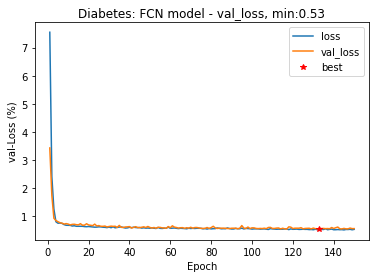

In [83]:
# 훈련 데이터와 검증 데이터에 대한 loss 시각화.
epochs = range(1, len(hist.history['loss']) + 1)

loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]

plt.plot(epochs,loss_list)  
plt.plot(epochs,vloss_list)

plt.plot(np.argmin(np.array(vloss_list))+1,vloss_list[np.argmin(np.array(vloss_list))], 'r*')
plt.title('Diabetes: FCN model - val_loss, min:' + str(np.round(vloss_list[np.argmin(np.array(vloss_list))],2)))
plt.ylabel('val-Loss (%)')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss','best'], loc='best')
plt.show()

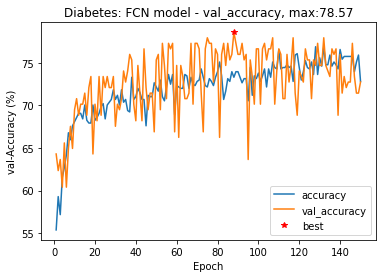

In [84]:
# 훈련 데이터와 검증 데이터에 대한 accuracy 시각화.
epochs = range(1, len(hist.history['accuracy']) + 1)

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('Diabetes: FCN model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],2)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

In [85]:
# model performance
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7273


[0.5491381883621216, 0.7272727489471436]

## Predictiion of the train data

In [86]:
y_train[:5],y_train.shape

(array([0, 1, 1, 0, 0]), (614,))

In [87]:
model.predict(X_train)[0:5],[int(np.round(prob)) for prob in model.predict(X_train)[0:5]]

(array([[0.24493968],
        [0.60369086],
        [0.6385635 ],
        [0.08611673],
        [0.14762789]], dtype=float32), [0, 1, 1, 0, 0])

## Predictiion of the test data

In [88]:
# Prediction of the test data
print(y_test[:10])
model.predict(X_test)[0:10],[int(np.round(prob)) for prob in model.predict(X_test)[0:10]]

[0 0 1 1 0 0 0 0 1 0]


(array([[0.10310945],
        [0.22732303],
        [0.44497377],
        [0.3988219 ],
        [0.18157223],
        [0.5887275 ],
        [0.43886495],
        [0.19572264],
        [0.5266051 ],
        [0.22186834]], dtype=float32), [0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [89]:
# y_test[:10]==[int(np.round(prob)) for prob in model.predict(X_test)[0:10]]

In [90]:
# make class predictions for test data with the model
predictions = [int(np.round(prob)) for prob in model.predict(X_test)]
predictions[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

In [91]:
# summarize the first 10 cases in testset
for i in range(10):
   print('%s => %d (expected %d)' % (X_test[i], predictions[i], y_test[i]))

[  0.    113.     80.     16.      0.     31.      0.874  21.   ] => 0 (expected 0)
[  3.    180.     64.     25.     70.     34.      0.271  26.   ] => 0 (expected 0)
[  7.    114.     64.      0.      0.     27.4     0.732  34.   ] => 0 (expected 1)
[  1.    125.     50.     40.    167.     33.3     0.962  28.   ] => 0 (expected 1)
[  2.    120.     76.     37.    105.     39.7     0.215  29.   ] => 0 (expected 0)
[  2.    128.     64.     42.      0.     40.      1.101  24.   ] => 1 (expected 0)
[  4.    137.     84.      0.      0.     31.2     0.252  30.   ] => 0 (expected 0)
[  3.   103.    72.    30.   152.    27.6    0.73  27.  ] => 0 (expected 0)
[  6.    190.     92.      0.      0.     35.5     0.278  66.   ] => 1 (expected 1)
[  1.    109.     56.     21.    135.     25.2     0.833  23.   ] => 0 (expected 0)


### Confusion matrix

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        99
           1       0.69      0.44      0.53        55

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154



In [94]:
cm = confusion_matrix(y_test, predictions)

In [95]:
class_names = ['noDM','DM']

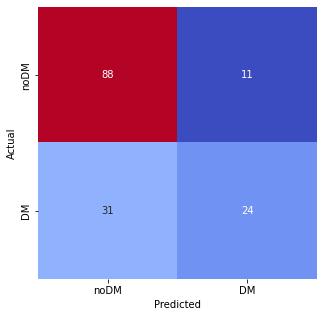

In [96]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## [DIY-1] Save the best model
- hdf5 file

In [97]:
# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)
# define the keras model
model2 = Sequential([
    Dense(12, input_dim=8, activation='relu'),  # 1st hidden layer 
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')                 
])
# compile the keras model
model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


### callbacks

In [98]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_DL_best_weights.{epoch:03d}-{val_accuracy:.3f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [99]:
# fit the keras model on the dataset
hist = model2.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))


Epoch 1/500
62/62 [==============================] - 1s 5ms/step - loss: 7.5488 - accuracy: 0.5537 - val_loss: 3.4242 - val_accuracy: 0.6429
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 2.4032 - accuracy: 0.5928 - val_loss: 1.7341 - val_accuracy: 0.6234
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 1.2483 - accuracy: 0.5717 - val_loss: 0.9172 - val_accuracy: 0.6364
Epoch 4/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.6156 - val_loss: 0.8362 - val_accuracy: 0.6039
Epoch 5/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.6270 - val_loss: 0.7949 - val_accuracy: 0.6558
Epoch 6/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.6417 - val_loss: 0.7583 - val_accuracy: 0.6039
Epoch 7/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7345 - accuracy: 0.6678 - val_loss: 0.7421 - val_accuracy: 0.6494
Epoch 8/500
6

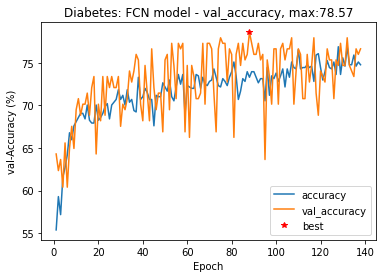

In [100]:
# 훈련 데이터와 검증 데이터에 대한 accuracy 시각화.
epochs = range(1, len(hist.history['accuracy']) + 1)

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('Diabetes: FCN model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],2)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

### best model
> diabetes_DL_best_weights.088-0.786.hdf5

In [101]:
# model2 performance
model2.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7662


[0.5446837544441223, 0.7662337422370911]

In [102]:
from keras.models import load_model

# model = load_model('your_best_model.hdf5')
model2_best = load_model('diabetes_DL_best_weights.088-0.786.hdf5')
model2_best.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7857


[0.5515814423561096, 0.7857142686843872]

### Confusion matrix ot the best model

In [103]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# make class predictions for test data with the model
predictions = [int(np.round(prob)) for prob in model2_best.predict(X_test)]

cm = confusion_matrix(y_test, predictions)

In [104]:
class_names = ['noDM','DM']

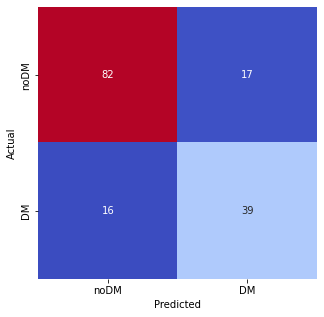

In [105]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---

## [DIY-2] Save the best model after preprocessing data
- StandardScaler

In [106]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [107]:
# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)
# define the keras model
model2s = Sequential([
    Dense(12, input_dim=8, activation='relu'),  
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')                 
])
# compile the keras model
model2s.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


### callbacks

In [108]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_DL_SS_best_weights.{epoch:03d}-{val_accuracy:.3f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [109]:
# fit the keras model on the dataset
hist = model2s.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))


Epoch 1/500
62/62 [==============================] - 1s 5ms/step - loss: 0.6474 - accuracy: 0.6254 - val_loss: 0.6372 - val_accuracy: 0.6688
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.6987 - val_loss: 0.5858 - val_accuracy: 0.6948
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7280 - val_loss: 0.5576 - val_accuracy: 0.7338
Epoch 4/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.7443 - val_loss: 0.5406 - val_accuracy: 0.7662
Epoch 5/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7573 - val_loss: 0.5272 - val_accuracy: 0.7662
Epoch 6/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7606 - val_loss: 0.5200 - val_accuracy: 0.7662
Epoch 7/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7590 - val_loss: 0.5168 - val_accuracy: 0.7532
Epoch 8/500
6

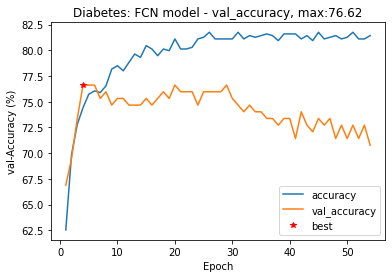

In [110]:
# 훈련 데이터와 검증 데이터에 대한 accuracy 시각화.
epochs = range(1, len(hist.history['accuracy']) + 1)

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('Diabetes: FCN model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],2)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

### best model
> diabetes_DL_SS_best_weights.004-0.766.hdf5

In [111]:
# model2 performance
model2s.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7078


[0.5084622502326965, 0.7077922224998474]

In [112]:
from keras.models import load_model

# model = load_model('your_best_model.hdf5')
model2s_best = load_model('diabetes_DL_SS_best_weights.004-0.766.hdf5')
model2s_best.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7662


[0.5406255125999451, 0.7662337422370911]

### Confusion matrix ot the best model

In [113]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# make class predictions for test data with the model
predictions = [int(np.round(prob)) for prob in model2s_best.predict(X_test)]

cm = confusion_matrix(y_test, predictions)

In [114]:
class_names = ['noDM','DM']

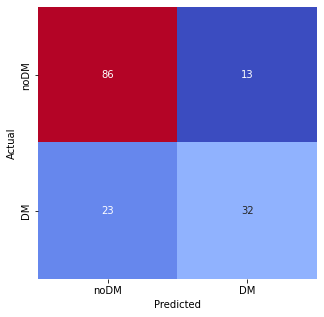

In [115]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***

## [DIY-3] 데이터 전처리 후 딥러닝 모델 만들어서 평가
- 결과가 좋아지는지, 아니면 나빠지는지를 확인하시오.

## Check data
- null
- NaN

In [116]:
# Check NaN
# data.isna().sum()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 과연 diabetes 데이터는 문제가 없는가?

- 각 항목에서 0이 허용되지 않는 경우에 0이 있다면 => 문제 있는 데이터!
- Pregnancies, Outcome은 0이 가능한 값이므로 제외하고 0이 있는 항목(column) 조사

In [117]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [118]:
# Pregnancies, Outcome은 0이 가능한 값이므로 제외하고 0이 있는 항목(column) 조사
columns_with_zero = df.columns[(df==0).sum() > 0][1:-1]
columns_with_zero

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [119]:
# Clean the data : zero2median()
# 1. Check zeros in features with Pregnancies, Outcome excluded.
# 2. Replace zero with NaN 
# 3. Replace NaN with the median of the corresponding featurs
def zero2median(df):
    columns_with_zero = df.columns[(df==0).sum() > 0][1:-1]
    # Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')
    df[columns_with_zero]=df[columns_with_zero].replace(0,np.nan)
    for feature in columns_with_zero:
        df[feature].fillna(df[feature].median(),inplace=True)
    
    return df

# Make clean dataframe, df2 from df
df2 = zero2median(df)

In [120]:
df2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


## [DIY3] 전처리된 데이터프레임 df2를 이용해서 FCN으로 best model을 찾으시오.
- best model: hdf5 file
- Accuracy graph
- Confusion matrix graph

In [121]:
# Your code here
X = np.array(df2.drop(['Outcome'], 1))
y = np.array(df2['Outcome'])

# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

y





array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [123]:
# set random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

# define the keras model: simple FCN
model3 = Sequential()
model3.add(Dense(12, input_dim=8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
# compile the keras model
model3.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [124]:
hist = model3.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1, 
                 validation_data=(X_test, y_test))

Epoch 1/150
62/62 [==============================] - 1s 5ms/step - loss: 7.8953 - accuracy: 0.4707 - val_loss: 2.2277 - val_accuracy: 0.5195
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 1.1414 - accuracy: 0.5993 - val_loss: 0.8590 - val_accuracy: 0.6429
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.8470 - accuracy: 0.6384 - val_loss: 0.7411 - val_accuracy: 0.6948
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7663 - accuracy: 0.6384 - val_loss: 0.7462 - val_accuracy: 0.6364
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7389 - accuracy: 0.6140 - val_loss: 0.6871 - val_accuracy: 0.7208
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.6384 - val_loss: 0.6905 - val_accuracy: 0.7013
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.6547 - val_loss: 0.6581 - val_accuracy: 0.7273
Epoch 8/150
6

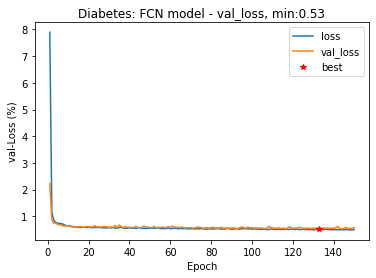

In [125]:
# 훈련 데이터와 검증 데이터에 대한 loss 시각화.
epochs = range(1, len(hist.history['loss']) + 1)

loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]

plt.plot(epochs,loss_list)  
plt.plot(epochs,vloss_list)

plt.plot(np.argmin(np.array(vloss_list))+1,vloss_list[np.argmin(np.array(vloss_list))], 'r*')
plt.title('Diabetes: FCN model - val_loss, min:' + str(np.round(vloss_list[np.argmin(np.array(vloss_list))],2)))
plt.ylabel('val-Loss (%)')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss','best'], loc='best')
plt.show()

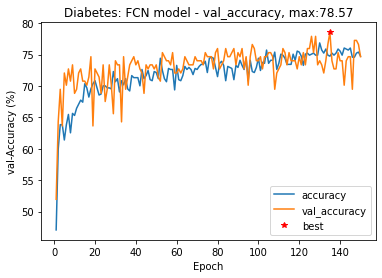

In [126]:
# 훈련 데이터와 검증 데이터에 대한 accuracy 시각화.
epochs = range(1, len(hist.history['accuracy']) + 1)

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('Diabetes: FCN model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],2)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

In [127]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_DL_SS_best_weights.{epoch:03d}-{val_accuracy:.3f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [128]:
hist = model3.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))

Epoch 1/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7638 - val_loss: 0.5592 - val_accuracy: 0.7143
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7443 - val_loss: 0.5449 - val_accuracy: 0.7273
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7671 - val_loss: 0.5496 - val_accuracy: 0.7403
Epoch 4/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7671 - val_loss: 0.5547 - val_accuracy: 0.7338
Epoch 5/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7362 - val_loss: 0.5782 - val_accuracy: 0.7403
Epoch 6/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7459 - val_loss: 0.5596 - val_accuracy: 0.7597
Epoch 7/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7736 - val_loss: 0.5463 - val_accuracy: 0.7403
Epoch 8/500
6

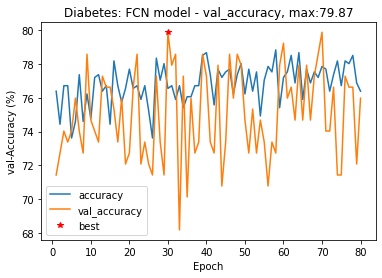

In [129]:
epochs = range(1, len(hist.history['accuracy']) + 1)

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('Diabetes: FCN model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],2)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

diabetes_DL_SS_best_weights.030-0.799.hdf5


In [130]:
from keras.models import load_model

# model = load_model('your_best_model.hdf5')
model3_best = load_model('diabetes_DL_SS_best_weights.030-0.799.hdf5')
model3_best.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7987


[0.5358181595802307, 0.798701286315918]

In [131]:
predictions = [int(np.round(prob)) for prob in model3_best.predict(X_test)]

cm = confusion_matrix(y_test, predictions)

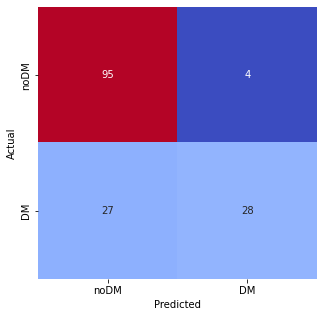

In [132]:
class_names = ['noDM','DM']
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()